In [28]:
import numpy as np

import random
import math
import pandas as pd
from random import uniform

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.losses import MeanSquaredError

from tensorflow.keras.optimizers import SGD


from matplotlib import pyplot as plt


# 1 Questão - Rosenblatt

* Criação de mapa com os tipos possíveis de entrada
* Para cada tipo possível, criação de 2000 conjuntos de dados em 3 dimensões, com dispersão de 0.2 (-0.1 a +0.1)
* Embaralhamento dos 16 mil conjuntos de dados criados


In [29]:
input = []
output = []

map = [
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1]
]

for i in range(0,8):
    for j in range(0,2001):
        a = map[i][0]+uniform(-0.1,0.1)
        b = map[i][1]+uniform(-0.1,0.1)
        c = map[i][2]+uniform(-0.1,0.1)
        input.append([a,b,c])
        output.append(i)


In [30]:
input = np.array(input)
output = np.array(output)

input, output = shuffle(input, output, random_state=0)
#Separação de dados em 80% para treino e 20% para teste
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=7)


In [31]:
model = Sequential()
model.add(Dense(1, activation="relu", input_dim=3))
model.compile(loss=MeanSquaredError(), metrics=['mse'])


* Criação de modelo com 1 camada e 1 único neurônio utilizando “relu” como função de ativação e 3 dados de entrada
* Execução do modelo, em lotes de 10 e 100 épocas


In [32]:
result = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=100)

Epoch 1/100
1281/1281 [==============================] - 4s 3ms/step - loss: 13.3052 - mse: 13.3052 - val_loss: 5.9891 - val_mse: 5.9891
Epoch 2/100
1281/1281 [==============================] - 2s 1ms/step - loss: 2.9591 - mse: 2.9591 - val_loss: 1.5751 - val_mse: 1.5751
Epoch 3/100
1281/1281 [==============================] - 2s 2ms/step - loss: 0.9685 - mse: 0.9685 - val_loss: 0.4974 - val_mse: 0.4974
Epoch 4/100
1281/1281 [==============================] - 2s 2ms/step - loss: 0.2413 - mse: 0.2413 - val_loss: 0.1000 - val_mse: 0.1000
Epoch 5/100
1281/1281 [==============================] - 2s 2ms/step - loss: 0.0743 - mse: 0.0743 - val_loss: 0.0668 - val_mse: 0.0668
Epoch 6/100
1281/1281 [==============================] - 2s 2ms/step - loss: 0.0655 - mse: 0.0655 - val_loss: 0.0656 - val_mse: 0.0656
Epoch 7/100
1281/1281 [==============================] - 2s 2ms/step - loss: 0.0653 - mse: 0.0653 - val_loss: 0.0652 - val_mse: 0.0652
Epoch 8/100
1281/1281 [==============================

In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.save('model.p5')

INFO:tensorflow:Assets written to: model.p5/assets


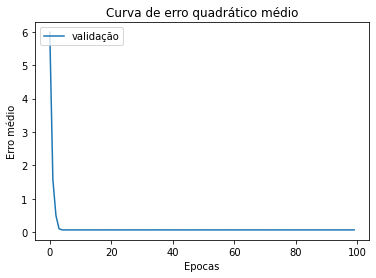

In [35]:
plt.plot(result.history['val_mse'])
plt.title('Curva de erro quadrático médio')
plt.xlabel('Epocas')
plt.ylabel('Erro médio')
plt.legend(['validação'], loc='upper left')
plt.show()

In [36]:
from keras.models import load_model
from sklearn.metrics import r2_score, mean_absolute_error 
import numpy as np

model = load_model('model.p5')

yhat = model.predict(x_test)
r2 = r2_score(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)

print(f"O R2 Score obtido do conjunto de teste foi de {r2}")
print(f"O MAE obtido do conjunto de teste foi de {mae}")
print("")

map = [
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1]
]
output = model.predict(np.array(map))


for i in range(0,8):
    print(f'Input: {map[i]} | Expected Output: {i} | Output: {output[i][0]}')
    

O R2 Score obtido do conjunto de teste foi de 0.9874970276076286
O MAE obtido do conjunto de teste foi de 0.2063945560273409

Input: [0, 0, 0] | Expected Output: 0 | Output: 0.0
Input: [0, 0, 1] | Expected Output: 1 | Output: 0.9893565773963928
Input: [0, 1, 0] | Expected Output: 2 | Output: 1.9834469556808472
Input: [0, 1, 1] | Expected Output: 3 | Output: 2.998241901397705
Input: [1, 0, 0] | Expected Output: 4 | Output: 3.9381983280181885
Input: [1, 0, 1] | Expected Output: 5 | Output: 4.952993392944336
Input: [1, 1, 0] | Expected Output: 6 | Output: 5.947083950042725
Input: [1, 1, 1] | Expected Output: 7 | Output: 6.961878776550293


Considerando os vértices do cubo com coordenadas:
0,0,0
0,0,1
0,1,0
0,1,1
1,0,0
1,0,1
1,1,0
1,1,1

O modelo gerou resultados com aproximação satisfatória relacionando as saídas {0,1,..,7} com os vértices {a,b,...,g}.

# Questão 2


## Questão 2 - A

In [37]:

#Definição do conjunto de entradas e saidas
amostras=[ [0,0], [0,1], [1,0], [1,1] ]
saidas=[ [0], [1], [1], [0] ]


In [38]:
rvaux=[]
for i in range( 0, len(amostras) ):
    rvaux.append( i );
        
for i in range( 0, len(amostras) ):
    r = random.randint(0, len(amostras)-i-1 )
    aux = amostras[ i ]
    amostras[ i ] = amostras[ rvaux[ r ] ]
    amostras[ rvaux[ r ] ] = aux
    
    aux2 = saidas[ i ]
    saidas[ i ] = saidas[ rvaux[ r ] ]
    saidas[ rvaux[ r ] ] = aux2
    
    del rvaux[ r ] 

In [39]:
model = Sequential()
model.add(Dense(2, activation='sigmoid',input_dim=2))
model.add(Dense(1, activation='sigmoid'))
sgd = SGD(learning_rate=0.5)
model.compile(loss=MeanSquaredError(), optimizer=sgd, metrics=['mse'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [40]:
historico=model.fit( amostras, saidas, batch_size=1, epochs=5000 )

A saída de streaming foi truncada nas últimas 5000 linhas.
4/4 [==============================] - 0s 4ms/step - loss: 0.1339 - mse: 0.1339
Epoch 2502/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.1339 - mse: 0.1339    
Epoch 2503/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1339 - mse: 0.1339
Epoch 2504/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1339 - mse: 0.1339
Epoch 2505/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.1339 - mse: 0.1339    
Epoch 2506/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.1339 - mse: 0.1339
Epoch 2507/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.1339 - mse: 0.1339    
Epoch 2508/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.1339 - mse: 0.1339
Epoch 2509/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1339 - mse: 0.1339    
Epoch 2510/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.

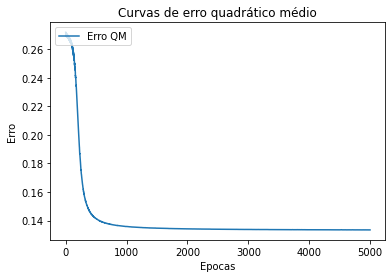

In [41]:
plt.plot(historico.history['mse'])
plt.title('Curvas de erro quadrático médio')
plt.xlabel('Epocas')
plt.ylabel('Erro')
plt.legend(['Erro QM'], loc='upper left')
plt.show()


In [42]:
from sklearn.metrics import mean_absolute_error, r2_score
entradas=[ [ 0, 0 ], [ 0, 1 ], [ 1, 0 ], [ 1, 1 ] ]
entradas_output = [0,1,1,0]
saidas = model.predict( entradas )
mae = mean_absolute_error(entradas_output, saidas)
r2 = r2_score(entradas_output, saidas)
print(f"MAE das entradas foi de {mae}")
print(f"R2 Score das entradas foi de {r2}")
print('')
for i in range( 0, len(entradas) ):    
    print( f'{entradas[i][0]} xor {entradas[i][1]} = {saidas[i][0]}', end='\n' )

MAE das entradas foi de 0.2582823932170868
R2 Score das entradas foi de 0.4984846743498821

0 xor 0 = 0.015915274620056152
0 xor 1 = 0.9837784767150879
1 xor 0 = 0.5011805295944214
1 xor 1 = 0.5021733045578003


## Questão 2 - b

In [43]:
amostras = []
for i in range( 0, 50 ):        
    for j in np.arange( 1, 11, 0.01 ):
        if ( j != int( j ) ):
            amostras.append( j ) 

rvaux=[]
for i in range( 0, len(amostras) ):
    rvaux.append( i );
        
for i in range( 0, len(amostras) ):
    r = random.randint(0, len(amostras)-i-1 )
    aux = amostras[ i ]
    amostras[ i ] = amostras[ rvaux[ r ] ]
    amostras[ rvaux[ r ] ] = aux
    del rvaux[ r ]
    
print(f"Temos um total de {len(amostras)} amostras")

Temos um total de 49950 amostras


In [44]:
saidas=[]
for i in range( 0, len( amostras ) ):
    saidas.append( math.log10( amostras[i] ) )

In [45]:
x_treino, x_teste, y_treino, y_teste=train_test_split(amostras, saidas, test_size=0.2, random_state=42)   

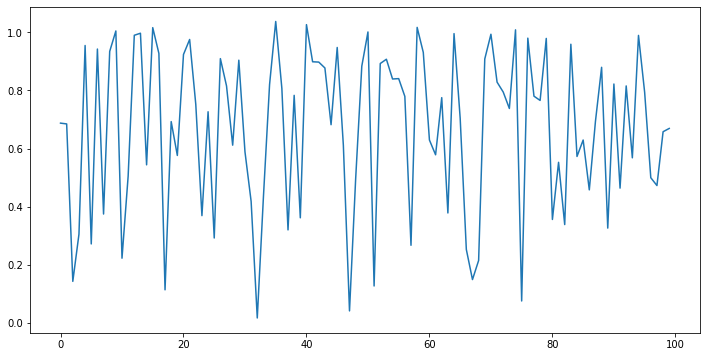

In [46]:
plt.figure(figsize = (12,6))
plt.plot(saidas[:100])

In [47]:
model = Sequential()
model.add(Dense(3, activation='selu',input_dim=1))
model.add(Dense(1, activation='selu'))

model.compile(loss=MeanSquaredError(), metrics=['mse'])

historico=model.fit( x_treino, y_treino, validation_data=(x_teste, y_teste), batch_size=10, epochs=10 )

Epoch 1/10
3996/3996 [==============================] - 11s 3ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 1.5743e-04 - val_mse: 1.5743e-04
Epoch 2/10
3996/3996 [==============================] - 10s 3ms/step - loss: 1.8459e-04 - mse: 1.8459e-04 - val_loss: 5.9005e-05 - val_mse: 5.9005e-05
Epoch 3/10
3996/3996 [==============================] - 10s 3ms/step - loss: 1.3270e-04 - mse: 1.3270e-04 - val_loss: 1.7026e-05 - val_mse: 1.7026e-05
Epoch 4/10
3996/3996 [==============================] - 7s 2ms/step - loss: 9.4103e-05 - mse: 9.4103e-05 - val_loss: 2.6636e-05 - val_mse: 2.6636e-05
Epoch 5/10
3996/3996 [==============================] - 6s 2ms/step - loss: 6.5082e-05 - mse: 6.5082e-05 - val_loss: 1.9480e-05 - val_mse: 1.9480e-05
Epoch 6/10
3996/3996 [==============================] - 6s 2ms/step - loss: 5.0467e-05 - mse: 5.0467e-05 - val_loss: 6.6003e-06 - val_mse: 6.6003e-06
Epoch 7/10
3996/3996 [==============================] - 6s 2ms/step - loss: 4.1976e-05 - mse: 4.1976e-05 

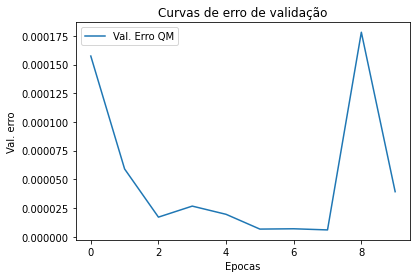

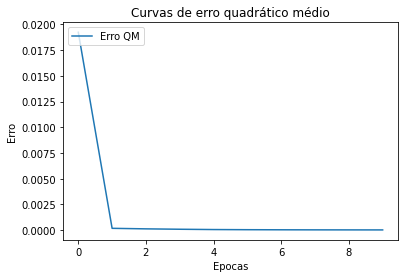

In [48]:
plt.plot(historico.history['val_mse'])
plt.title('Curvas de erro de validação')
plt.xlabel('Epocas')
plt.ylabel('Val. erro')
plt.legend(['Val. Erro QM'], loc='upper left')
plt.show()
plt.plot(historico.history['mse'])
plt.title('Curvas de erro quadrático médio')
plt.xlabel('Epocas')
plt.ylabel('Erro')
plt.legend(['Erro QM'], loc='upper left')
plt.show()

In [49]:
entradas=[]
for x in range( 1, 11 ):
    entradas.append( x )
yhat = model.predict(x_teste)
r2 = r2_score(y_teste, yhat)
mae = mean_absolute_error(y_teste, yhat)

print(f"O MAE obtido do conjunto de teste foi de {mae}")
print(f"O R2 Score obtido do conjunto de teste foi de {r2}")
print("")

saidas = model.predict( entradas )

for i in range( 0, len(entradas) ):    
    print( f'log10({entradas[i]})={math.log10(entradas[i])}  <==>  {saidas[i][0]}', end='\n' )

O MAE obtido do conjunto de teste foi de 0.005968051173754243
O R2 Score obtido do conjunto de teste foi de 0.9994220848285844

log10(1)=0.0  <==>  0.007480445317924023
log10(2)=0.3010299956639812  <==>  0.2928950786590576
log10(3)=0.47712125471966244  <==>  0.4709814190864563
log10(4)=0.6020599913279624  <==>  0.5983715653419495
log10(5)=0.6989700043360189  <==>  0.6946684718132019
log10(6)=0.7781512503836436  <==>  0.7718947529792786
log10(7)=0.8450980400142568  <==>  0.8374246954917908
log10(8)=0.9030899869919435  <==>  0.8957806825637817
log10(9)=0.9542425094393249  <==>  0.9467436075210571
log10(10)=1.0  <==>  0.9946613907814026


## Questão 2 - C

* Para função de ativação foi utilizado a função SELU. o output do selu são dados normalizados, resultando em uma convergência mais rápida;
* Selu não temos o problema de “explodir o gradiente”;
* Adamax é a generealização do Adam, Baseia-se nas estimativas adaptativas de momentos de ordem inferior


Epoch 1/100
2378/2378 - 8s - loss: 103964347465728.0000 - mse: 103964347465728.0000 - accuracy: 0.0000e+00 - val_loss: 102931282001920.0000 - val_mse: 102931298779136.0000 - val_accuracy: 0.0000e+00 - 8s/epoch - 3ms/step
Epoch 2/100
2378/2378 - 4s - loss: 103525438717952.0000 - mse: 103525438717952.0000 - accuracy: 0.0000e+00 - val_loss: 101969150607360.0000 - val_mse: 101969150607360.0000 - val_accuracy: 0.0000e+00 - 4s/epoch - 2ms/step
Epoch 3/100
2378/2378 - 4s - loss: 101284220764160.0000 - mse: 101284220764160.0000 - accuracy: 0.0000e+00 - val_loss: 97970460557312.0000 - val_mse: 97970460557312.0000 - val_accuracy: 0.0000e+00 - 4s/epoch - 2ms/step
Epoch 4/100
2378/2378 - 4s - loss: 95225028542464.0000 - mse: 95225028542464.0000 - accuracy: 0.0000e+00 - val_loss: 89609895673856.0000 - val_mse: 89609895673856.0000 - val_accuracy: 0.0000e+00 - 4s/epoch - 2ms/step
Epoch 5/100
2378/2378 - 4s - loss: 83420789080064.0000 - mse: 83420789080064.0000 - accuracy: 0.0000e+00 - val_loss: 74622

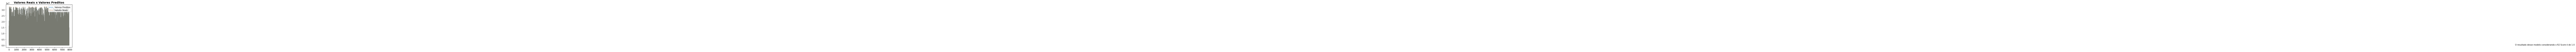

O resultado desse modelo considerando o R2 Score é de 0.9997797702085248


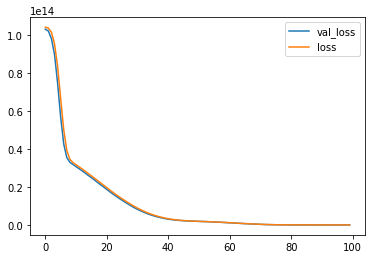

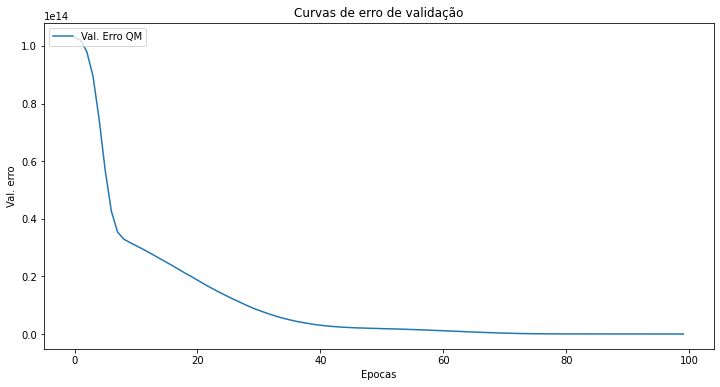

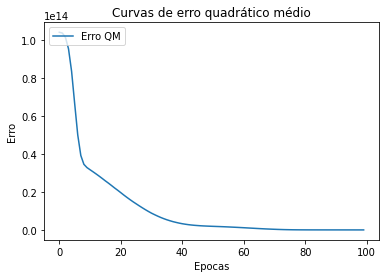

In [60]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score

def equation(n):
  equation = (10 * np.power(n,5)) + (5 * np.power(n,4)) + (2 * np.power(n,3)) - (0.5 * np.power(n,2)) + (3 * n) + 2 
  return equation

def generate_samples(end,interval = 0.03):
  samples = np.arange(0,end,interval)
  amostras = []
  for i in range( 0, end ):        
    for j in np.arange( 1, 20, 0.03):
        amostras.append( j )
  labels = []
  for i in range(len(amostras)):
      labels.append(equation(amostras[i]))
  return amostras, labels

def plot_model(historico: pd.DataFrame):
    plt.plot(historico.history['val_loss'], label='val_loss')
    plt.plot(historico.history['loss'], label='loss')
    plt.legend()
    plt.show()
def plot_mse_error(historico: pd.DataFrame):
  plt.figure(figsize = (12,6))
  plt.plot(historico.history['val_mse'])
  plt.title('Curvas de erro de validação')
  plt.xlabel('Epocas')
  plt.ylabel('Val. erro')
  plt.legend(['Val. Erro QM'], loc='upper left')
  plt.plot(historico.history['mse'])
  plt.title('Curvas de erro quadrático médio')
  plt.xlabel('Epocas')
  plt.ylabel('Erro')
  plt.legend(['Erro QM'], loc='upper left')
  plt.show()
def evaluate_model(model, X_test, y_test):
    yhat = model.predict(X_test)
    r2 = r2_score(y_test, yhat)
    plt.plot(yhat, label='Valores Preditos', )
    plt.plot(y_test, label='Valores Reais',alpha = 0.4)
    plt.title('Valores Reais x Valores Preditos',fontsize = 14, fontweight = 'bold')
    plt.text(x = 330000, y = 0, s = f"O resultado desse modelo considerando o R2 Score é de {round(r2,2)}")
    plt.legend()
    plt.show()
    print(f"O resultado desse modelo considerando o R2 Score é de {r2}")
def build_nn(X,y):
    X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=42)   
    model = Sequential()
    model.add(Dense(units = 15, input_shape = (1,), activation = 'selu',))

    model.add(Dense(units = 12,  activation = 'selu',))
    model.add(Dense(units = 6,  activation = 'selu',))

    model.add(Dense(units = 1, activation = 'selu'))
    model.compile(optimizer = 'adamax', loss='mse', metrics=['mse','accuracy'])
    historico = model.fit(x=X_train, y=y_train, validation_data = (X_test,y_test), batch_size=10, epochs=100, verbose=2)
    evaluate_model(model,X_test,y_test)
    plot_model(historico)
    plot_mse_error(historico)
    return model,X_test,y_test,  
X,y  = generate_samples(50)
model,X_test,y_test,= build_nn(X,y)

## Modelo com casos de uso simplificado

In [63]:
def equation(n):
  equation = (10 * np.power(n,5)) + (5 * np.power(n,4)) + (2 * np.power(n,3)) - (0.5 * np.power(n,2)) + (3 * n) + 2 
  return equation

def generate_samples():
  X = np.zeros((5000,1))
  y = np.zeros((5000,1))

  for i in range(len(X)):
      X[i] = np.random.random() * 10 + 0.001
      
      y[i] = equation(X[i])
  return X,y

def plot_model(historico: pd.DataFrame):
    plt.figure(figsize = (12,8))
    plt.plot(historico.history['val_loss'], label='val_loss')
    plt.plot(historico.history['loss'], label='loss')
    plt.legend()
    plt.show()
def plot_mse_error(historico: pd.DataFrame):
  plt.figure(figsize = (12,6))
  plt.plot(historico.history['val_mse'])
  plt.title('Curvas de erro de validação')
  plt.xlabel('Epocas')
  plt.ylabel('Val. erro')
  plt.legend(['Val. Erro QM'], loc='upper left')
  plt.show()
  plt.figure(figsize = (12,6))
  plt.plot(historico.history['mse'])
  plt.title('Curvas de erro quadrático médio')
  plt.xlabel('Epocas')
  plt.ylabel('Erro')
  plt.legend(['Erro QM'], loc='upper left')
  plt.show()
def evaluate_model(model, X_test, y_test):
    yhat = model.predict(X_test)
    r2 = r2_score(y_test, yhat)
    plt.figure(figsize = (12,6))
    plt.plot(yhat, label='Valores Preditos', )
    plt.plot(y_test, label='Valores Reais',alpha = 0.4)
    plt.title('Valores Reais x Valores Preditos',fontsize = 14, fontweight = 'bold')
    #plt.text(x = 330000, y = 0, s = f"O resultado desse modelo considerando o R2 Score é de {round(r2,2)}")
    plt.legend()
    plt.show()
    print(f"O resultado desse modelo considerando o R2 Score é de {r2}")

def build_nn(X,y):
    X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=42)   
    model = Sequential()
    model.add(Dense(units = 30, input_shape = (1,), activation = 'relu',))
    model.add(Dense(units = 15,  activation = 'relu',))
    model.add(Dense(units = 7,  activation = 'relu',))
    model.add(Dense(units = 1, activation = 'linear'))
    model.compile(optimizer = 'adam', loss='mse', metrics=['mse','accuracy'])
    historico = model.fit(x=X_train, y=y_train, validation_data = (X_test,y_test), batch_size=64, epochs=2000, verbose=2)
    evaluate_model(model,X_test,y_test)
    plot_model(historico)
    plot_mse_error(historico)
    return model,X_test,y_test

Epoch 1/2000
59/59 - 1s - loss: 101567709184.0000 - mse: 101567709184.0000 - accuracy: 0.0000e+00 - val_loss: 108153987072.0000 - val_mse: 108153987072.0000 - val_accuracy: 0.0000e+00 - 1s/epoch - 22ms/step
Epoch 2/2000
59/59 - 0s - loss: 101566898176.0000 - mse: 101566898176.0000 - accuracy: 0.0000e+00 - val_loss: 108152594432.0000 - val_mse: 108152594432.0000 - val_accuracy: 0.0000e+00 - 256ms/epoch - 4ms/step
Epoch 3/2000
59/59 - 0s - loss: 101564145664.0000 - mse: 101564145664.0000 - accuracy: 0.0000e+00 - val_loss: 108147269632.0000 - val_mse: 108147269632.0000 - val_accuracy: 0.0000e+00 - 239ms/epoch - 4ms/step
Epoch 4/2000
59/59 - 0s - loss: 101554208768.0000 - mse: 101554208768.0000 - accuracy: 0.0000e+00 - val_loss: 108129435648.0000 - val_mse: 108129435648.0000 - val_accuracy: 0.0000e+00 - 130ms/epoch - 2ms/step
Epoch 5/2000
59/59 - 0s - loss: 101526667264.0000 - mse: 101526667264.0000 - accuracy: 0.0000e+00 - val_loss: 108085739520.0000 - val_mse: 108085739520.0000 - val_acc

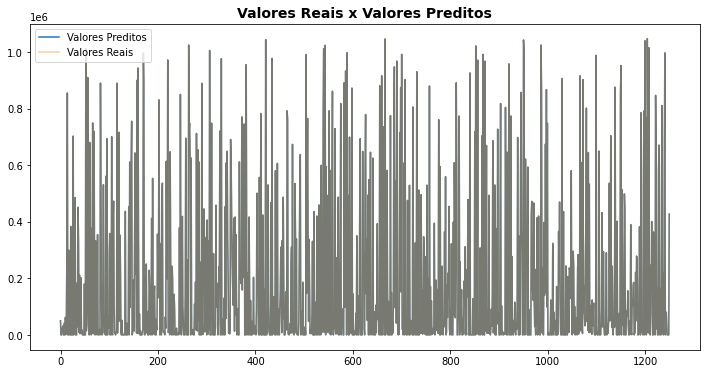

O resultado desse modelo considerando o R2 Score é de 0.9999961062466702


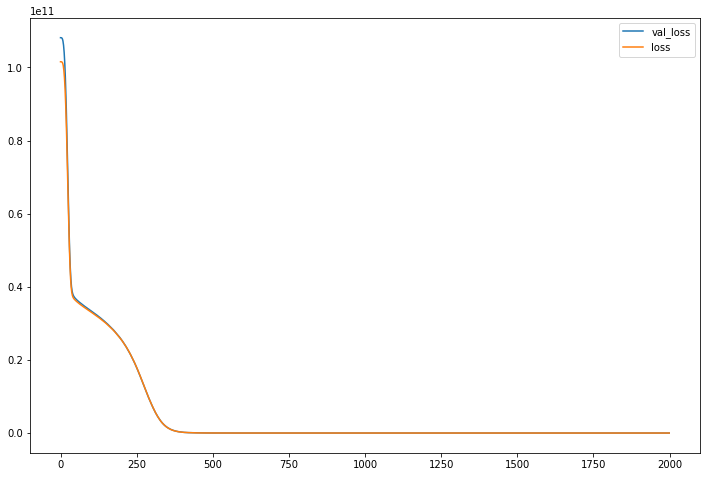

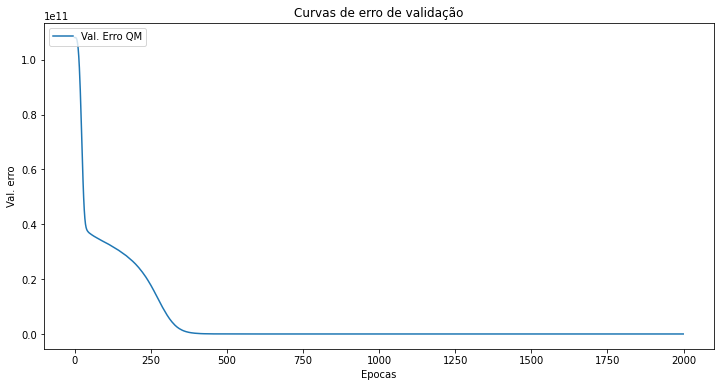

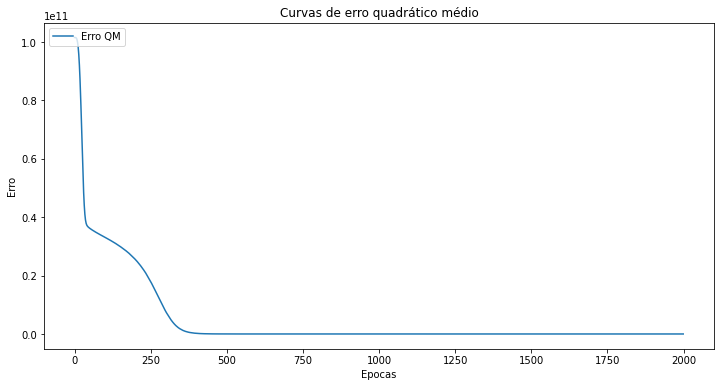

In [64]:
X, y = generate_samples()
model,X_test,y_test = build_nn(X,y)

In [65]:
y_test[500]

array([533.15749403])

In [66]:
yhat = model.predict(X_test[500])
yhat

array([[322.4204]], dtype=float32)

# 3 - Questão

##Métodos para geração de dados

In [68]:
import random
import math
import time

import matplotlib.pyplot as plt 

from matplotlib import colors

def geraPontos( n ):
    vx = []
    vy = []

    random.seed( time.time() )

    for i in range( 0, n ):
        r = random.uniform( 0, 1 );
        theta = random.uniform( -math.pi, math.pi )
        
        x = r * math.cos( theta )
        y = r * math.sin( theta )
        
        vx.append( x )
        vy.append( y )
    
    return vx, vy;
        
        
def geraClasses( vx, vy ):
    vclasses = []

    for i in range( 0, len( vx ) ):        
        x = vx[ i ]
        y = vy[ i ]
        
        classe = 0
        if ( x < 0 ):
            if ( y > 0 ):
                c = x - y + 1
                if ( c > 0 ):
                    classe = 2
                elif ( c < 0 ):
                    classe = 6
            elif ( y < 0 ):
                c = x + y + 1
                if ( c > 0 ):
                    classe = 3
                elif ( c < 0 ):
                    classe = 7
        elif ( x > 0 ):
            if ( y > 0 ):
                c = 1 - x - y
                if ( c > 0 ):
                    classe = 1
                elif ( c < 0 ):
                    classe = 5
            elif ( y < 0 ):
                c = y - x + 1
                if ( c > 0 ):
                    classe = 4
                elif ( c < 0 ):
                    classe = 8
                  
        vclasses.append( classe )
        
    return vclasses
    

def pontosToXYVets( pontos ):
    vx = [];
    vy = [];
    for i in range( 0, len(pontos) ):
        vx.append( pontos[ i ][ 0 ] )
        vy.append( pontos[ i ][ 1 ] )
        
    return (vx, vy)

def xyVetsToPontos( vx, vy ):
    pontos = []
    for i in range( 0, len( vx ) ):
        pontos.append( [ vx[i], vy[ i ] ] )
    return pontos;
    

def classeToSaida( classeI ):
    saida = []
    for i in range( 0, 9 ):
        if ( i == classeI ):
            saida.append( 1 )
        else: 
            saida.append( 0 )
    return saida        

def saidaToClasse( saida ):    
    for i in range( 0, 9 ):
        if ( saida[i] >= 0.5 ):
            return i;
    return 0; 
            
def classesToSaidas( vclasses ):
    saidas = []
    for i in range( 0, len(vclasses) ):
        saidas.append( classeToSaida( vclasses[ i ] ) )
    return saidas;

def saidasToClasses( saidas ):
    vclasses = []
    for i in range( 0, len(saidas) ):
        vclasses.append( saidaToClasse( saidas[ i ] ) )
    return vclasses;


def classes( vclasses ):
    classes = [ 'C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8' ]
    
    vet = []
    for i in range( 0, len( vclasses ) ):
        vet.append( classes[ vclasses[ i ] ] )    
    return vet;

def plotaDados( vx, vy, vclasses ):            
    fig, ax = plt.subplots(figsize = (12,8))    
        
    circle = plt.Circle((0,0), 1, color='k', fill=False)
    ax.add_patch( circle )
    
    plt.plot( [ -1, 0, 1 ], [ 0, 0, 0 ], color='k' )
    plt.plot( [  0, 0, 0 ], [ -1, 0, 1 ], color='k' )
    plt.plot( [ -1, -0.5, 0 ], [ 0, 0.5, 1 ], color='k' )
    plt.plot( [ -1, -0.5, 0 ], [ 0, -0.5, -1 ], color='k' )
    plt.plot( [ 0, 0.5, 1 ], [ 1, 0.5, 0 ], color='k' )
    plt.plot( [ 0, 0.5, 1 ], [ -1, -0.5, 0 ], color='k' )
    
    vcores = cores( vclasses )
    
    plt.scatter( vx, vy, s=20, marker='o', c=vcores )
    
    plt.show()
            
def cores( vclasses ):
    cores = [ 
        colors.to_rgb('black'), 
        colors.to_rgb('blue'),
        colors.to_rgb('red'),
        colors.to_rgb('green'),
        colors.to_rgb('yellow'),
        colors.to_rgb('cyan'),
        colors.to_rgb('maroon'),
        colors.to_rgb('magenta'),
        colors.to_rgb('orange') ]
    
    vcores = []
    for i in range( 0, len( vclasses ) ):
        vcores.append( cores[ vclasses[ i ] ] )    
    return vcores;            

## Treinamento do Modelo

Epoch 1/500
125/125 [==============================] - 1s 8ms/step - loss: 0.0936 - mse: 0.0936 - val_loss: 0.0880 - val_mse: 0.0880
Epoch 2/500
125/125 [==============================] - 1s 4ms/step - loss: 0.0817 - mse: 0.0817 - val_loss: 0.0756 - val_mse: 0.0756
Epoch 3/500
125/125 [==============================] - 0s 2ms/step - loss: 0.0697 - mse: 0.0697 - val_loss: 0.0646 - val_mse: 0.0646
Epoch 4/500
125/125 [==============================] - 0s 2ms/step - loss: 0.0603 - mse: 0.0603 - val_loss: 0.0570 - val_mse: 0.0570
Epoch 5/500
125/125 [==============================] - 0s 2ms/step - loss: 0.0538 - mse: 0.0538 - val_loss: 0.0512 - val_mse: 0.0512
Epoch 6/500
125/125 [==============================] - 0s 2ms/step - loss: 0.0482 - mse: 0.0482 - val_loss: 0.0457 - val_mse: 0.0457
Epoch 7/500
125/125 [==============================] - 0s 2ms/step - loss: 0.0433 - mse: 0.0433 - val_loss: 0.0411 - val_mse: 0.0411
Epoch 8/500
125/125 [==============================] - 0s 2ms/step - 

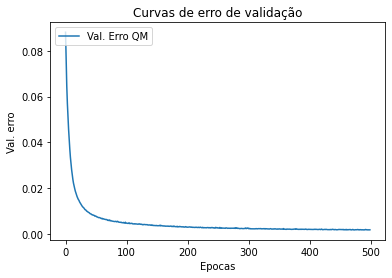

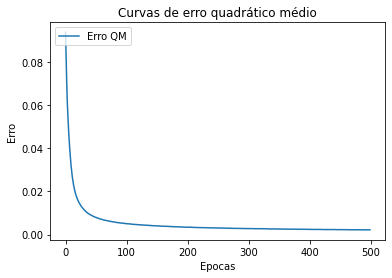

In [69]:
from keras.models import Sequential
from keras.layers import Dense

from tensorflow.keras.optimizers import Adam

from keras.losses import MeanSquaredError

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

vx, vy = geraPontos( 10000 )
vclasses = geraClasses( vx, vy )

pontos = xyVetsToPontos( vx, vy );
saidas = classesToSaidas( vclasses ) 

x_treino, x_teste, y_treino, y_teste=train_test_split(pontos, saidas, test_size=0.2, random_state=42)   
    
model = Sequential()
model.add(Dense(5, activation='selu',input_dim=2))
model.add(Dense(5, activation='selu'))
model.add(Dense(9, activation='softmax'))

optimizer=Adam()
model.compile(loss=MeanSquaredError(), optimizer=optimizer, metrics=['mse'])

historico=model.fit( x_treino, y_treino, validation_data=(x_teste, y_teste), batch_size=64, epochs=500 )

model.save( 'rna.p5')      

plt.plot(historico.history['val_mse'])
plt.title('Curvas de erro de validação')
plt.xlabel('Epocas')
plt.ylabel('Val. erro')
plt.legend(['Val. Erro QM'], loc='upper left')
plt.show()


plt.plot(historico.history['mse'])
plt.title('Curvas de erro quadrático médio')
plt.xlabel('Epocas')
plt.ylabel('Erro')
plt.legend(['Erro QM'], loc='upper left')
plt.show()

In [70]:
from sklearn import metrics

from keras.models import load_model

model = load_model( 'rna.p5' )

vx, vy = geraPontos( 1000 )
vclasses = geraClasses( vx, vy )

pontos = xyVetsToPontos( vx, vy )

saidasObtidas = model.predict( pontos )

vclassesPreditas = saidasToClasses( saidasObtidas )

cMat = metrics.confusion_matrix( vclasses, vclassesPreditas )

print( cMat )

[[  0   0   0   0   0   0   0   0   0]
 [  1 192   0   0   0   0   0   0   0]
 [  1   2 207   0   0   0   1   0   0]
 [  1   0   1 191   3   0   0   0   0]
 [  1   0   0   0 171   0   0   0   3]
 [  1   4   0   0   0  50   0   0   0]
 [  0   0   1   0   0   0  65   0   0]
 [  0   0   0   1   0   0   0  54   0]
 [  0   0   0   0   2   0   0   0  47]]


<Figure size 864x504 with 0 Axes>

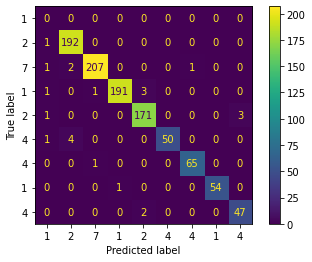

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize = (12,7))
disp = ConfusionMatrixDisplay(confusion_matrix = cMat,   display_labels=vclasses)
disp.plot()
plt.show()

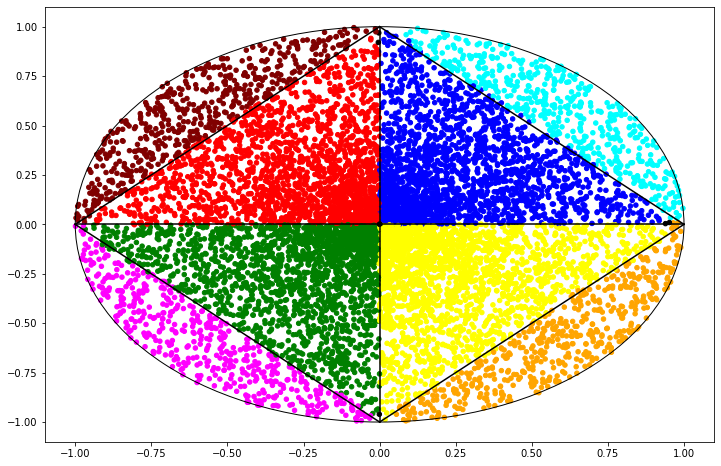

In [72]:
model = load_model( 'rna.p5' )
#model = load_model( 'rna_momentum.p5' )

vx, vy = geraPontos( 10000 )
pontos = xyVetsToPontos( vx, vy );

saidas = model.predict( pontos )

vclasses = saidasToClasses( saidas )

plotaDados( vx, vy, vclasses )

## Modelo com Mometum

Epoch 1/500
125/125 [==============================] - 1s 4ms/step - loss: 0.1003 - mse: 0.1003 - val_loss: 0.0995 - val_mse: 0.0995
Epoch 2/500
125/125 [==============================] - 0s 2ms/step - loss: 0.0989 - mse: 0.0989 - val_loss: 0.0981 - val_mse: 0.0981
Epoch 3/500
125/125 [==============================] - 0s 2ms/step - loss: 0.0977 - mse: 0.0977 - val_loss: 0.0970 - val_mse: 0.0970
Epoch 4/500
125/125 [==============================] - 0s 2ms/step - loss: 0.0967 - mse: 0.0967 - val_loss: 0.0961 - val_mse: 0.0961
Epoch 5/500
125/125 [==============================] - 0s 2ms/step - loss: 0.0958 - mse: 0.0958 - val_loss: 0.0952 - val_mse: 0.0952
Epoch 6/500
125/125 [==============================] - 0s 2ms/step - loss: 0.0949 - mse: 0.0949 - val_loss: 0.0944 - val_mse: 0.0944
Epoch 7/500
125/125 [==============================] - 0s 2ms/step - loss: 0.0941 - mse: 0.0941 - val_loss: 0.0935 - val_mse: 0.0935
Epoch 8/500
125/125 [==============================] - 0s 2ms/step - 

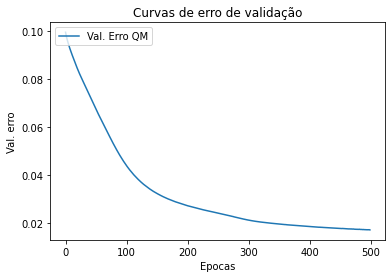

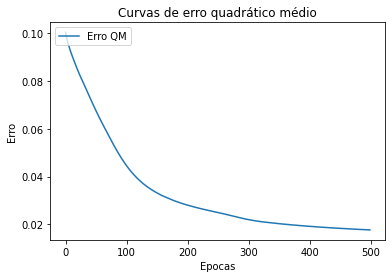

In [73]:
vx, vy = geraPontos( 10000 )
vclasses = geraClasses( vx, vy )

pontos = xyVetsToPontos( vx, vy );
saidas = classesToSaidas( vclasses ) 

x_treino, x_teste, y_treino, y_teste=train_test_split(pontos, saidas, test_size=0.2, random_state=42)   
    
model = Sequential()
model.add(Dense(5, activation='selu',input_dim=2))
model.add(Dense(5, activation='selu'))
model.add(Dense(9, activation='softmax'))

optimizer=SGD(momentum=0.75)
model.compile(loss=MeanSquaredError(), optimizer=optimizer, metrics=['mse'])

historico=model.fit( x_treino, y_treino, validation_data=(x_teste, y_teste), batch_size=64, epochs=500 )

model.save( 'rna_momentum.p5')

plt.plot(historico.history['val_mse'])
plt.title('Curvas de erro de validação')
plt.xlabel('Epocas')
plt.ylabel('Val. erro')
plt.legend(['Val. Erro QM'], loc='upper left')
plt.show()


plt.plot(historico.history['mse'])
plt.title('Curvas de erro quadrático médio')
plt.xlabel('Epocas')
plt.ylabel('Erro')
plt.legend(['Erro QM'], loc='upper left')
plt.show()      

In [74]:
model = load_model( 'rna_momentum.p5' )

vx, vy = geraPontos( 1000 )
vclasses =geraClasses( vx, vy )

pontos = xyVetsToPontos( vx, vy )

saidasObtidas = model.predict( pontos )

vclassesPreditas = saidasToClasses( saidasObtidas )

cMat = metrics.confusion_matrix( vclasses, vclassesPreditas )

print( cMat )

[[  0   0   0   0   0   0   0   0   0]
 [  9 193   1   0   1   1   0   0   0]
 [ 14   1 182   0   0   0   0   0   0]
 [  4   0   2 194   0   0   0   0   0]
 [  5   0   0   0 190   0   0   0   1]
 [  0   3   0   0   0  46   0   0   0]
 [  1   0   4   0   0   0  48   0   0]
 [  1   0   0  30   0   0   0   0  21]
 [  0   0   0   0   1   0   0   0  47]]


<Figure size 864x504 with 0 Axes>

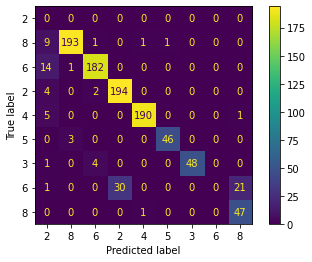

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize = (12,7))
disp = ConfusionMatrixDisplay(confusion_matrix = cMat,   display_labels=vclasses)
disp.plot()
plt.show()

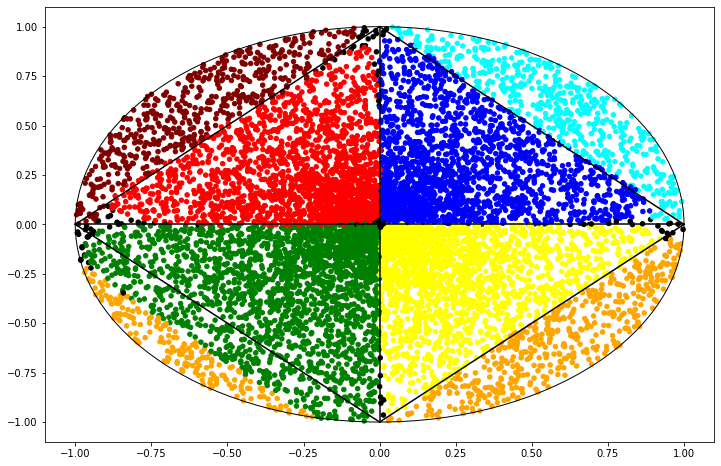

In [76]:

model = load_model( 'rna_momentum.p5' )

vx, vy = geraPontos( 10000 )
pontos = xyVetsToPontos( vx, vy );

saidas = model.predict( pontos )

vclasses = saidasToClasses( saidas )

plotaDados( vx, vy, vclasses )

# 4 Questão

In [77]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score


In [97]:
def _ts_function(n):
  equation = np.power(np.sin(n),2) + np.cos(n + np.cos(n))
  return equation

def build_samples(n = 1000):
  X = []
  y = []
  for i in range(n):
    aux_x = []
    aux_y = []
    for x_value in range(i- 10,i,):
      aux_x.append(_ts_function(x_value))
    X.append(aux_x)
    for y_value in range(i + 1, i + 4):
      aux_y.append(_ts_function(y_value))
    y.append(aux_y)
  return X,y

def get_metrics(model, X_test:np.array, y_test:np.array):
  yhat = model.predict(X_test)
  r2 = r2_score(y_test, yhat)
  plt.figure(figsize = (12,6))
  plt.scatter(y_test,yhat)
  plt.xlabel('Valores Reais', fontsize = 14)
  plt.ylabel('Resultados Preditos', fontsize = 14)
  plt.title("Valores Reais x Valores Preditos",fontsize = 14, fontweight = 'bold')
  plt.text(x = -0.8, y = 0.90, s=  f"O resultado desse modelo considerando o R2 Score é de {round(r2,2)}", fontsize = 12)
  plt.show()
  print(f'O resultado desse modelo considerando o R2 Score é de {r2}')
  return yhat
def plot_model(history: pd.DataFrame):
  plt.figure(figsize = (12,6))
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.title("Curvas de Perda", fontsize = 12, fontweight = 'bold')
  plt.legend()
  plt.show()
def plot_mse_error(historico: pd.DataFrame):
  plt.figure(figsize = (12,6))
  plt.plot(historico.history['mean_squared_error'],label = 'Erro Quadrático Médio')
  plt.plot(historico.history['val_mean_squared_error'],label = 'Curvas de Validação do Erro Quadrático Médio')
  plt.legend()
  plt.title("Curvas do Erro Quadrático Médio (MSE)",fontsize = 12, fontweight = 'bold')
  plt.show()
def get_predictions_plot(X_test,y_test,yhat, amostra):
  df_treinamento = pd.DataFrame(columns = ['Dados','Label'])
  df_real = pd.DataFrame(columns = ['Dados','Label'])
  df_validacao = pd.DataFrame(columns = ['Dados','Label'])
  aux_idx = 0
  indexes = []
  for idx, value in enumerate(X_test):
    df_treinamento.at[idx,'Dados'] = value
    df_treinamento.at[idx,'Label'] = 'Dados Treinamento'
    aux_idx = idx

  for value in y_test:
    df_real.at[aux_idx,'Dados'] = value
    df_real.at[aux_idx,'Label'] = 'Valores Reais'
    indexes.append(aux_idx)
    aux_idx += 1

  for value,index in zip(yhat,indexes):
    df_validacao.at[index,'Dados'] = value
    df_validacao.at[index,'Label'] = 'Valores Preditos'

  fig, ax = plt.subplots(1,1,figsize=(12,8))
  ax.plot(df_treinamento.index,df_treinamento['Dados'], color = 'blue', label = 'Dados de Treinamento')
  ax.plot(df_validacao.index, df_validacao['Dados'], color = 'red', label = 'Valores Preditos', alpha = 0.5)
  ax.plot(df_real.index,df_real['Dados'], color = 'green', label = 'Valores Reais')
  d = df_treinamento.index[-1] + 0.008
  ax.axvline(x=d, color='black', linestyle='--')
  ax.set_title(f'Predição dos dados da {amostra}',fontsize = 14)
  ax.set_xlabel('Indexes')
  ax.set_ylabel('Valores')
  plt.legend()
  plt.show()

def build_nn(X:list,y:list):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  model = Sequential()
  model.add(Dense(units = 10, input_shape = (10,), activation = 'tanh'))
  model.add(Dense(units = 8,  activation = 'tanh'))
  model.add(Dense(units = 5,  activation = 'tanh'))
  model.add(Dense(units = 3, activation = 'tanh'))
  model.compile(optimizer = 'nadam', loss='mean_squared_error', metrics=['mean_squared_error',])
  history = model.fit(x=X_train, y=y_train, validation_data = (X_test,y_test), batch_size=16, epochs=100, verbose=2)
  plot_model(history)
  plot_mse_error(history)
  yhat = get_metrics(model, X_test, y_test)
  aux = 0
  for i in range(len(X_test)):
    if aux == 3:
      break
    random_int = np.random.randint(50)
    get_predictions_plot(X_test[random_int],y_test[random_int],yhat[random_int],random_int)
    aux += 1
  return model


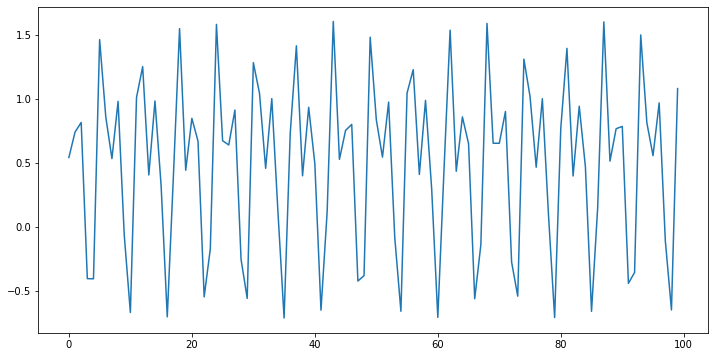

In [80]:
grafico = []
plt.figure(figsize = (12,6))
for i in range(0,100):
  grafico.append(_ts_function(i))
plt.plot(grafico)

* Como o problema utiliza a função seno e cosseno, então a tangente hiperbólica foi utilizada, considerando que a mesma possui saída variando entre -1 e 1.

* Foi utilizado como otimizador a variação do Adam, o NAdam, que utiliza a combinação do Adam com o Nesterov Mometum, na qual o mometo/mometum é aplicado aos parâmetros antes de calcular o gradiente


Epoch 1/100
47/47 - 1s - loss: 0.4194 - mean_squared_error: 0.4194 - val_loss: 0.2701 - val_mean_squared_error: 0.2701 - 1s/epoch - 29ms/step
Epoch 2/100
47/47 - 0s - loss: 0.2156 - mean_squared_error: 0.2156 - val_loss: 0.1818 - val_mean_squared_error: 0.1818 - 124ms/epoch - 3ms/step
Epoch 3/100
47/47 - 0s - loss: 0.1539 - mean_squared_error: 0.1539 - val_loss: 0.1392 - val_mean_squared_error: 0.1392 - 118ms/epoch - 3ms/step
Epoch 4/100
47/47 - 0s - loss: 0.1210 - mean_squared_error: 0.1210 - val_loss: 0.1134 - val_mean_squared_error: 0.1134 - 137ms/epoch - 3ms/step
Epoch 5/100
47/47 - 0s - loss: 0.1003 - mean_squared_error: 0.1003 - val_loss: 0.0965 - val_mean_squared_error: 0.0965 - 118ms/epoch - 3ms/step
Epoch 6/100
47/47 - 0s - loss: 0.0863 - mean_squared_error: 0.0863 - val_loss: 0.0845 - val_mean_squared_error: 0.0845 - 115ms/epoch - 2ms/step
Epoch 7/100
47/47 - 0s - loss: 0.0761 - mean_squared_error: 0.0761 - val_loss: 0.0755 - val_mean_squared_error: 0.0755 - 114ms/epoch - 2ms

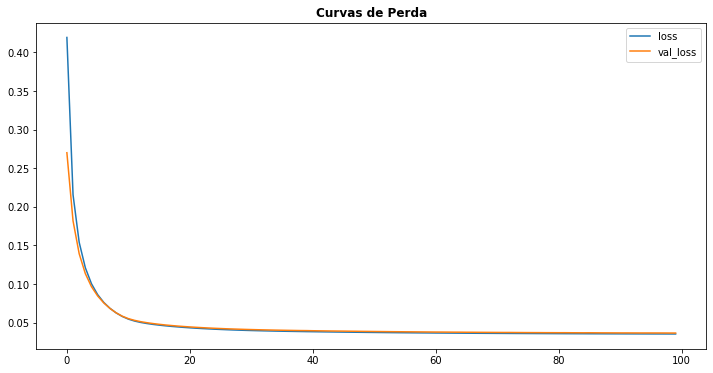

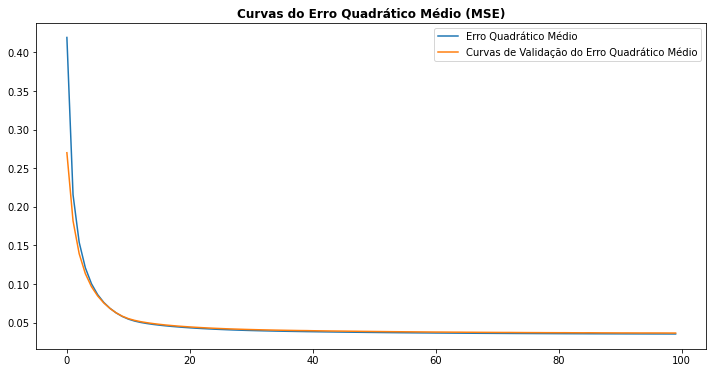

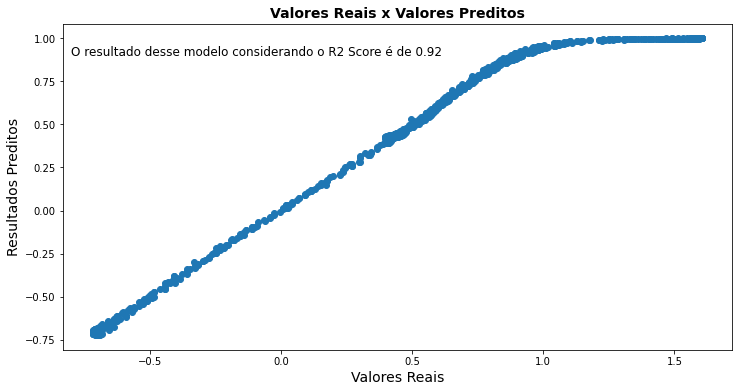

O resultado desse modelo considerando o R2 Score é de 0.917522709618333


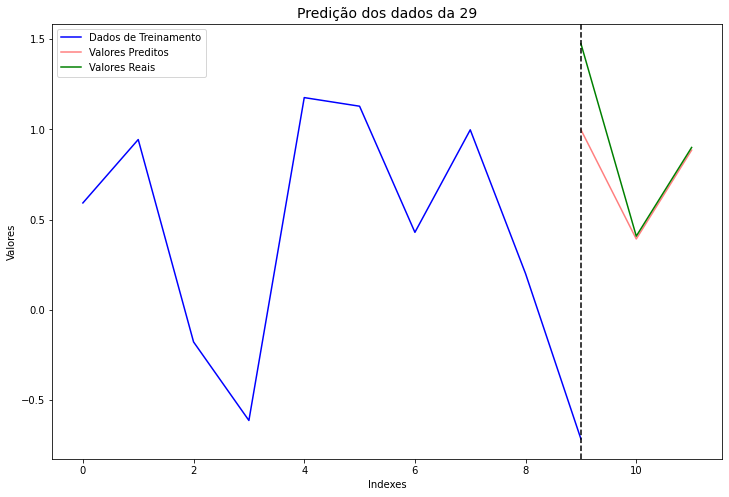

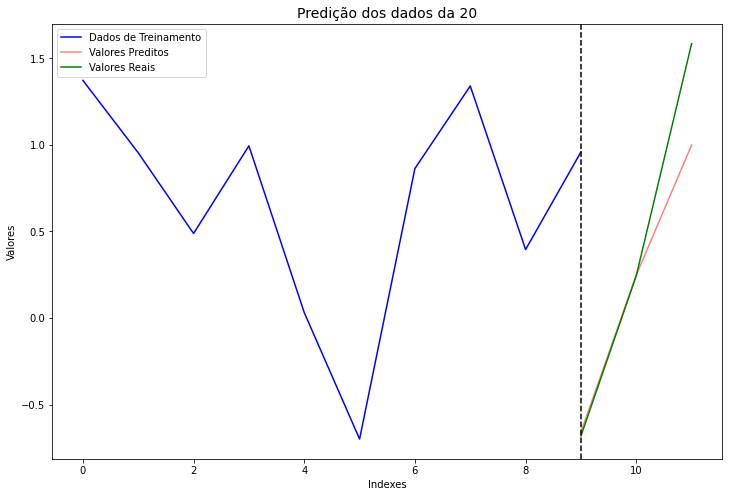

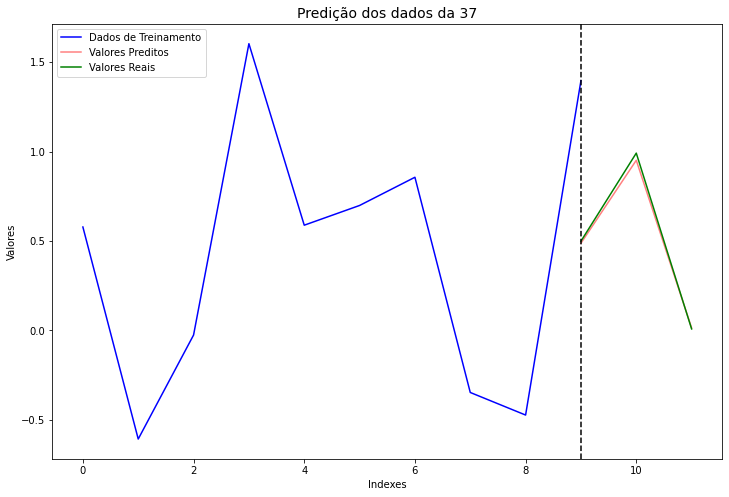

In [98]:
X, y = build_samples()
model = build_nn(X,y)

## Rede Neural - Simplificada

Epoch 1/100
75/75 - 3s - loss: 0.5383 - mean_squared_error: 0.5383 - val_loss: 0.3071 - val_mean_squared_error: 0.3071 - 3s/epoch - 34ms/step
Epoch 2/100
75/75 - 0s - loss: 0.2101 - mean_squared_error: 0.2101 - val_loss: 0.1242 - val_mean_squared_error: 0.1242 - 267ms/epoch - 4ms/step
Epoch 3/100
75/75 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0554 - val_mean_squared_error: 0.0554 - 214ms/epoch - 3ms/step
Epoch 4/100
75/75 - 0s - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.0267 - val_mean_squared_error: 0.0267 - 435ms/epoch - 6ms/step
Epoch 5/100
75/75 - 0s - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0154 - val_mean_squared_error: 0.0154 - 380ms/epoch - 5ms/step
Epoch 6/100
75/75 - 1s - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0109 - val_mean_squared_error: 0.0109 - 508ms/epoch - 7ms/step
Epoch 7/100
75/75 - 0s - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0084 - val_mean_squared_error: 0.0084 - 392ms/epoch - 5ms

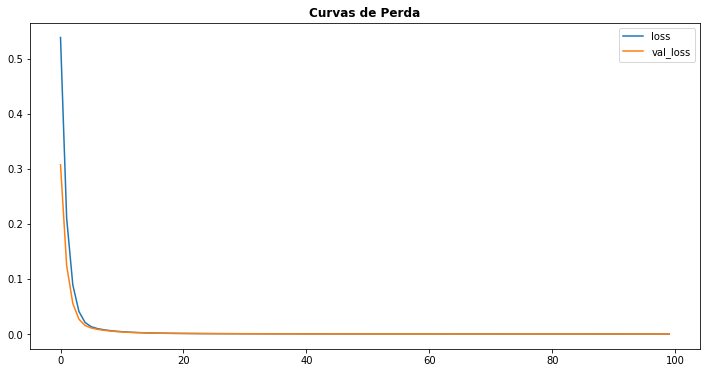

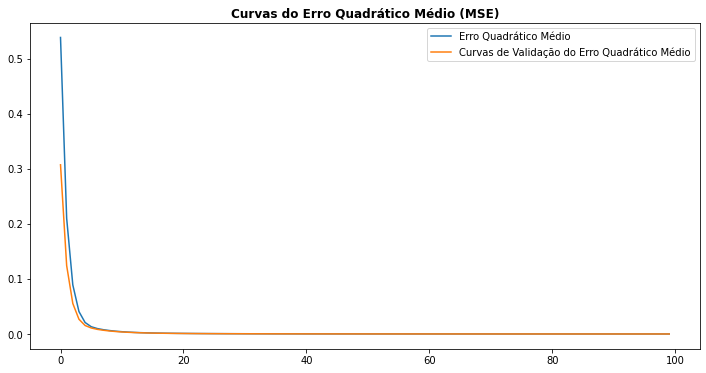

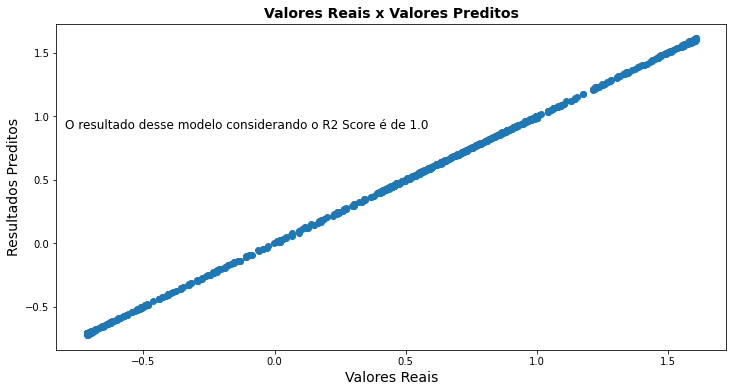

O resultado desse modelo considerando o R2 Score é de 0.9999601646077197
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 10)                110       
                                                                 
 dense_65 (Dense)            (None, 3)                 33        
                                                                 
Total params: 143
Trainable params: 143
Non-trainable params: 0
_________________________________________________________________


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = Sequential()
model.add(Dense(units = 10, input_shape = (10,), activation = 'tanh'))
model.add(Dense(units = 3, activation = 'linear'))
model.compile(optimizer = 'nadam', loss='mean_squared_error', metrics=['mean_squared_error',])
history = model.fit(x=X_train, y=y_train, validation_data = (X_test,y_test), batch_size=10, epochs=100, verbose=2)
plot_model(history)
plot_mse_error(history)
yhat = get_metrics(model, X_test, y_test)
model.summary()

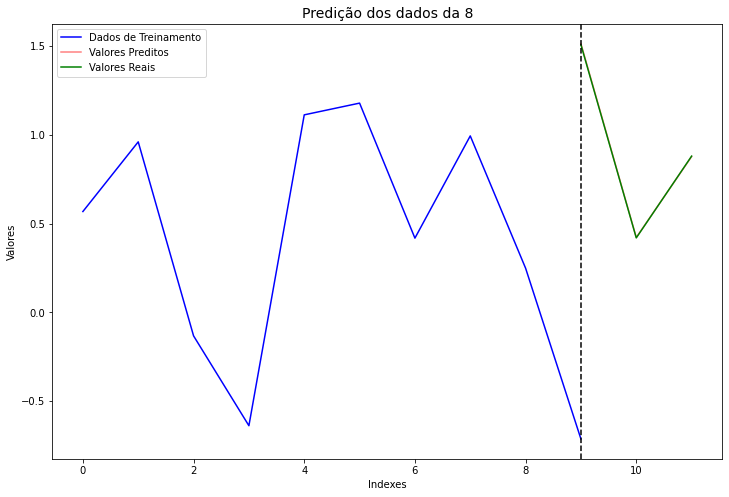

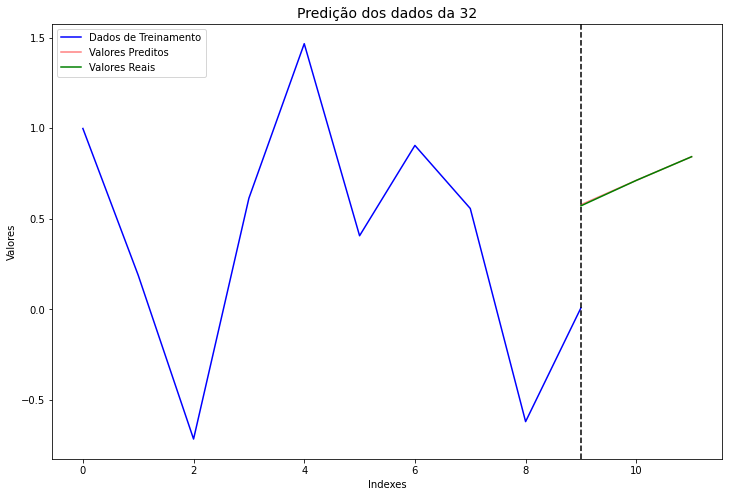

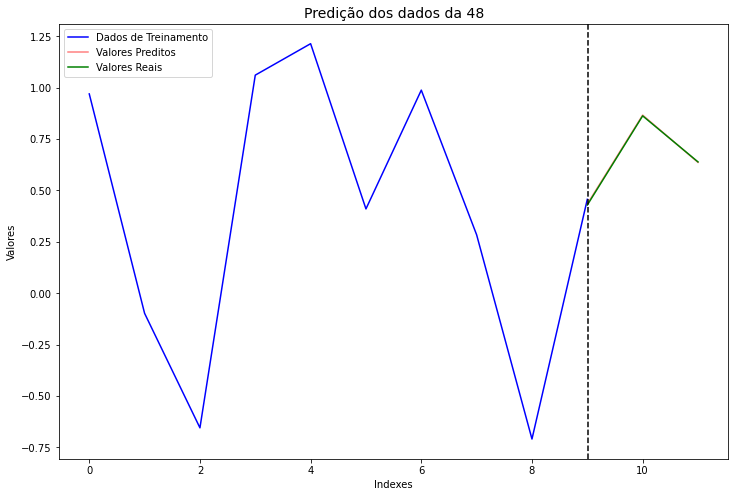

In [100]:
aux = 0
for i in range(len(X_test)):
  if aux == 3:
    break
  random_int = np.random.randint(50)
  get_predictions_plot(X_test[random_int],y_test[random_int],yhat[random_int],random_int)
  aux += 1
